<a href="https://colab.research.google.com/github/Mayank-004/VC-Industry-Predictive-analysis/blob/main/VC_Target_MOIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn


## Importing the dataset







In [2]:
url1 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VC_Exits.csv'
dataset1 = pd.read_csv(url1, error_bad_lines=False)

#url2 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCExit2.csv'
#dataset2 = pd.read_csv(url2, error_bad_lines=False)

url3 = 'https://raw.githubusercontent.com/Mayank-004/Project-in-python/main/VCData2.csv'
dataset3 = pd.read_csv(url3, error_bad_lines=False)

dataset = pd.merge(dataset1,dataset3,left_on=["Company PBID"],right_on=["Company ID"])



dataset


,Company PBID,Exit Date,Exit Size (millions),Pre Value (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,Total Preferred Capital Raised ($M)*,% Preferred Capital Raised*,Total Preferred Capital Raised ($M) - Combination**,% Preferred Capital Raised - Combination**,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Announced Date,Deal Date,Deal Size,Deal Size Status,Pre-money Valuation,...,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Revenue Growth since last debt deal,Gross Profit,Net Income,EBITDA,EBIT,Total Debt (from financials),Fiscal Year,Valuation/EBITDA,Valuation/EBIT,Valuation/Net Income,Valuation/Revenue,Valuation/Cash Flow,Deal Size/EBITDA,Deal Size/EBIT,Deal Size/Net Income,Deal Size/Revenue,Deal Size/Cash Flow,Debt/EBITDA,Debt/Equity,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,EBITDA Margin %,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
0,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,67911-49T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",1,67911-49T,NaN,01-Jan-2015,0.33,Actual,NaN,...,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
1,155748-70,11/15/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,NaN,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Other Software,"3D Printing, TMT, CloudTech & DevOps",Park City,Utah,United States,122433-04T,155748-70,Information Technology,Software,Other Software,"Business/Productivity Software, Other Software*","3D Printing, CloudTech & DevOps, TMT","additives manufacturing software, additives pr...",Formerly VC-backed,Generating Revenue,Venture Capital,131029-48P,"Texas A&M University, Ph.D. (Doctor of Philoso...",2,122433-04T,NaN,26-May-2015,NaN,NaN,NaN,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,US Dollars (USD),"Park City, UT",Americas,North America,Park City,Utah,84098,United States,2014.0
2,160695-55,1/13/17,NaN,NaN,NaN,Merger/Acquisition,Early Stage VC,$0.70,NaN,NaN,NaN,NaN,NaN,Information Technology,Software,Software Development Applications,"SaaS, TMT, CloudTech & DevOps",Tel Aviv,NaN,Israel,71323-57T,160695-55,Information Technology,Software,Software Development Applications,"Application Software, Software Development App...","CloudTech & DevOps, SaaS, TMT","a/b testing, application development, applicat...",Formerly VC-backed,Generating Revenue,Venture Capital,56786-14P,"BA (Bachelor of Arts), 2005, Business & Marketing",1,71323-57T,NaN,18-Mar-2016,0.70,Actual,NaN,...,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,US Dollars (USD),"Tel Aviv, Israel",Middle East,Middle East,Tel Aviv,NaN,NaN,Israel,2015.0
3,81857-08,3/18/19,$166.00,NaN,$166.00,Merger/Acquisition,Early Stage VC,$10.10,NaN,NaN,NaN,NaN,16.44x,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035

In [3]:
dataset.describe()

,Deal No.,Deal Size,Total Invested Equity,Debt Type 3,Debt Amount 1,Debt Amount 2,Debt Amount 3,Debt Raised in Round,Contingent Payout,# Investors,# New Investors,# Follow-on Investors,Implied EV,Revenue,Total Debt (from financials),Fiscal Year,Implied EV/EBITDA,Implied EV/EBIT,Implied EV/Net Income,Implied EV/Revenue,Implied EV/Cash Flow,Year Founded
count,305.000000,244.000000,229.000000,0.0,12.000000,1.0,0.0,12.000000,0.0,267.000000,246.000000,140.000000,0.0,81.000000,37.000000,91.000000,0.0,0.0,0.0,0.0,0.0,300.000000
mean,4.072131,38.641844,39.056201,NaN,23.090833,5.0,NaN,23.507500,NaN,3.883895,2.605691,2.792857,NaN,98.809877,22.639730,2016.274725,NaN,NaN,NaN,NaN,NaN,2011.023333
std,2.399570,84.661816,83.502049,NaN,57.814106,NaN,NaN,57.666114,NaN,3.423383,2.421630,1.867929,NaN,161.597687,64.688232,1.686982,NaN,NaN,NaN,NaN,NaN,3.928643
min,1.000000,0.030000,0.020000,NaN,0.040000,5.0,NaN,0.040000,NaN,1.000000,1.000000,1.000000,NaN,0.020000,0.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,1997.000000
25%,2.000000,2.000000,2.500000,NaN,0.212500,5.0,NaN,0.212500,NaN,1.000000,1.000000,1.000000,NaN,6.730000,0.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,2009.000000
50%,4.000000,8.400000,10.000000,NaN,1.500000,5.0,NaN,2.090000,NaN,3.000000,2.000000,2.000000,NaN,32.460000,0.000000,2016.000000,NaN,NaN,NaN,NaN,NaN,2012.000000
75%,5.000000,30.775000,31.000000,NaN,6.250000,5.0,NaN,7.750000,NaN,5.000000,3.000000,4.000000,NaN,100.000000,5.020000,2018.000000,NaN,NaN,NaN,NaN,NaN,2014.000000
max,14.000000,720.000000,720.000000,NaN,200.000000,5.0,NaN,200.000000,NaN,22.000000,16.000000,8.000000,NaN,844.800000,257.200000,2021.000000,NaN,NaN,NaN,NaN,NaN,2017.000000


In [4]:
dataset['MOIC']

0         NaN
1         NaN
2         NaN
3      16.44x
4         NaN
        ...  
300       NaN
301       NaN
302       NaN
303    55.20x
304    55.20x
Name: MOIC, Length: 305, dtype: object

Filling missing values of Target column MOIC

In [5]:
# target column MOIC is derived by Exit Size divided by Total VC capital raised
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace("$","") # removing $ from Total VC capital
dataset['Total VC Capital Raised ($M)***']= dataset['Total VC Capital Raised ($M)***'].str.replace(",","") # removing "," from Total VC capital
dataset.loc[:,'Total VC Capital Raised ($M)***'] = dataset.loc[:,'Total VC Capital Raised ($M)***'].astype(float) # converting Total VC capital to float from string
dataset['Total VC Capital Raised ($M)***']
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace("$","") # removing $ from Exit Size
dataset['Exit Size (millions)']= dataset['Exit Size (millions)'].str.replace(",","") # removing "," from Exit Size
dataset.loc[:,'Exit Size (millions)'] = dataset.loc[:,'Exit Size (millions)'].astype(float) # converting Total VC capital to float from string

dataset['MOIC']= dataset['MOIC'].str.replace("x","") # removing $ from MOIC
dataset['MOIC']= dataset['MOIC'].str.replace(",","") # removing ',' from MOIC
dataset.loc[:,'MOIC'] = dataset.loc[:,'MOIC'].astype(float) # converting MOIC to float from string


In [6]:
dataset['MOIC'].count()

108

In [7]:
dataset['MOIC'].isna().sum()

197

In [8]:
dataset.dropna(subset = ["MOIC"], inplace=True) # Drop rows with no values from Target column

In [ ]:
dataset.count()

Company PBID              108
Exit Date                 108
Exit Size (millions)      108
Pre Value (millions)       32
Post Value (millions)     104
                         ... 
Company City              108
Company State/Province     87
Company Post Code          97
Company Country           108
Year Founded              107
Length: 105, dtype: int64

In [9]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
Implied EV/Cash Flow,108,100.000000
Implied EV/EBIT,108,100.000000
Debt Amount 3,108,100.000000
Contingent Payout,108,100.000000
Implied EV,108,100.000000
...,...,...
Deal Size Status,9,8.333333
CEO PBId,5,4.629630
Post Value (millions),4,3.703704
Raised to Date,4,3.703704


Drop Column which has missing values more than 30%

In [10]:


dataset=dataset.drop(columns=[
'Deal Type',
'Implied EV/Cash Flow',
'Implied EV/Revenue',
'Implied EV/Net Income',
'Implied EV/EBITDA',
'Debt/EBITDA',
'Debt Type',
'Debt/Equity',
'Debt Type',
'Debt Amount 1',
'Valuation/Cash Flow',
'Valuation/EBITDA',
'Valuation/EBIT',
'Deal Size/Cash Flow',
'Valuation/Net Income',
'EBITDA Margin %',
'Gross Profit',
'Deal Size/EBITDA',
'Deal Size/EBIT',
'EBITDA',
'Total Debt (from financials)',
'Net Income',
'Deal Size/Net Income',
'EBIT',
'Revenue Growth since last debt deal',
'Valuation/Revenue',
'Pre Value (millions)',
'Deal Size/Revenue',
'Revenue',
'Price per Share',
'# Follow-on Investors',
'% Acquired',
'Employees',
'Pre-money Valuation',
'Total Preferred Capital Raised ($M) - Combination**',
'% Preferred Capital Raised - Combination**',
'% Preferred Capital Raised*',
'Total Preferred Capital Raised ($M)*',
'Deal Type 3',
'Debt Type 3',
'Debt Type 2'	,
'Debt Amount 3',
'Implied EV/EBIT',
'Implied EV',
'Contingent Payout',
'Debt Amount 2',
'Debt Raised in Round',
'Announced Date',
'Fiscal Year',
'VC Round Up/Down/Flat',
'Post Valuation',
'Post Valuation Status',
'Series',
])


In [ ]:
dataset

,Company PBID,Exit Date,Exit Size (millions),Post Value (millions),Exit Type,Last VC Deal Type,Total VC Capital Raised ($M)***,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Deal ID,Company ID,Primary Industry Sector,Primary Industry Group,Primary Industry Code,All Industries,Verticals_y,Keywords,Current Financing Status,Current Business Status,Universe,CEO PBId,CEO Education,Deal No.,Deal ID.1,Deal Date,Deal Size,Deal Size Status,Raised to Date,VC Round,Deal Type 2,Deal Class,Total Invested Equity,Deal Status,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,HQ Location,HQ Global Region,HQ Global Sub Region,Company City,Company State/Province,Company Post Code,Company Country,Year Founded
3,81857-08,3/18/19,166.00,$166.00,Merger/Acquisition,Early Stage VC,10.10,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,46035-10T,81857-08,Information Technology,Software,Business/Productivity Software,"Business/Productivity Software*, Social/Platfo...","CloudTech & DevOps, SaaS","agile management, data sync, enterprise softwa...",Formerly VC-backed,Generating Revenue,Venture Capital,93804-31P,"BS (Bachelor of Science), 1996, Computer Scien...",1,46035-10T,19-Feb-2015,10.10,Actual,10.10,1st Round,NaN,Venture Capital,10.10,Completed,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),"Georgetown, TX",Americas,North America,Georgetown,Texas,78626,United States,2013.0
17,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,69003-46T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",1,69003-46T,09-Sep-2016,3.30,Actual,3.30,1st Round,Seed Round,Venture Capital,3.30,Completed,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,2015.0
18,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,87814-00T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,92768-77P,"Diploma, 1992, Computer Engineering; Universit...",2,87814-00T,18-Apr-2017,14.50,Actual,17.80,2nd Round,Series A,Venture Capital,14.50,Completed,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,2015.0
19,157322-08,12/23/19,144.10,$144.10,Merger/Acquisition,Series B,37.80,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,115963-30T,157322-08,Information Technology,Software,Network Management Software,Network Management Software*,"CloudTech & DevOps, Cybersecurity","cloud application workload protection, cloud n...",Formerly VC-backed,Generating Revenue,Venture Capital,200154-88P,NaN,3,115963-30T,20-Dec-2018,20.00,Actual,37.80,3rd Round,Series B,Venture Capital,20.00,Completed,Generating Revenue,Venture Capital-Backed,5.0,3.0,NaN,US Dollars (USD),"San Jose, CA",Americas,North America,San Jose,California,95113,United States,2015.0
21,52228-63,1/24/17,3258.00,"$3,258.00",Merger/Acquisition,Series F,364.50,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,Cal

In [11]:
# Drop duplicate columns  

dataset=dataset.drop(columns=['Deal ID','Company ID','Primary Industry Sector','Primary Industry Group','Primary Industry Code','All Industries','Verticals_y','HQ Location','HQ Global Region','HQ Global Sub Region','Company City',	'Company State/Province',	'Company Post Code',	'Company Country'])




In [12]:
# Drop Column intuitively which may not have significant impact
dataset=dataset.drop(columns=['Company PBID','Exit Date','Exit Size (millions)','Post Value (millions)','Total VC Capital Raised ($M)***','Keywords','Deal No.','Deal ID.1','Deal Date','Deal Size Status','Deal Type 2','Deal Class','Deal Status','CEO PBId'])





In [ ]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,Year Founded
3,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),2013.0
17,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,3.30,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),2015.0
18,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,14.50,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),2015.0
19,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,20.00,Generating Revenue,Venture Capital-Backed,5.0,3.0,NaN,US Dollars (USD),2015.0
21,Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,California,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...","Brown University, BS (Bachelor of Science), 19...",158.00,335.00,6th Round,158.00,Generating Revenue,Venture Capital-Backed,12.0,8.0,"2,062",US Dollars (USD),2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,IPO,Series F,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,California,United States,Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital","University of Southern California (USC), BS (B...",124.55,260.00,6th Round,124.55,Generating Revenue,Venture Capital-Backed,9.0,5.0,200,US Dollars (USD),2008.0
297,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,NaN,US Dollars (USD),2005.0
298,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,13.0,5.0,NaN,US Dollars (USD),2005.0
303,IPO,Series D,55.20,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,8.0,4.0,"3,871",US Dollars (USD),2011.0


In [13]:
# calculating total working duration of company


from datetime import date 
todays_date = date.today() 

ts =todays_date.year

dataset['Total duration for Company'] = ts - dataset['Year Founded']

dataset=dataset.drop(columns=['Year Founded'])

dataset['Total duration for Company'] 

3       8.0
17      6.0
18      6.0
19      6.0
21     13.0
       ... 
291    13.0
297    16.0
298    16.0
303    10.0
304    10.0
Name: Total duration for Company, Length: 108, dtype: float64

In [ ]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,# New Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,1.0,1.0,6,US Dollars (USD),8.0
17,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,3.30,Stealth,Venture Capital-Backed,3.0,3.0,NaN,US Dollars (USD),6.0
18,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,14.50,Generating Revenue,Venture Capital-Backed,2.0,1.0,NaN,US Dollars (USD),6.0
19,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,20.00,Generating Revenue,Venture Capital-Backed,5.0,3.0,NaN,US Dollars (USD),6.0
21,Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,California,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...","Brown University, BS (Bachelor of Science), 19...",158.00,335.00,6th Round,158.00,Generating Revenue,Venture Capital-Backed,12.0,8.0,"2,062",US Dollars (USD),13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,IPO,Series F,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,California,United States,Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital","University of Southern California (USC), BS (B...",124.55,260.00,6th Round,124.55,Generating Revenue,Venture Capital-Backed,9.0,5.0,200,US Dollars (USD),13.0
297,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,NaN,US Dollars (USD),16.0
298,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,13.0,5.0,NaN,US Dollars (USD),16.0
303,IPO,Series D,55.20,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,8.0,4.0,"3,871",US Dollars (USD),10.0


In [14]:
# adding investors and new investors column together

dataset['# Investors']= dataset['# Investors']+dataset['# New Investors']
dataset=dataset.drop(columns=['# New Investors'])

In [15]:
dataset['# Investors']

3       2.0
17      6.0
18      3.0
19      8.0
21     20.0
       ... 
291    14.0
297     NaN
298    18.0
303    12.0
304    14.0
Name: # Investors, Length: 108, dtype: float64

In [ ]:
dataset

,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company
3,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,Generating Revenue,Venture Capital-Backed,2.0,6,US Dollars (USD),8.0
17,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,3.30,Stealth,Venture Capital-Backed,6.0,NaN,US Dollars (USD),6.0
18,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,14.50,Generating Revenue,Venture Capital-Backed,3.0,NaN,US Dollars (USD),6.0
19,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,NaN,20.00,37.80,3rd Round,20.00,Generating Revenue,Venture Capital-Backed,8.0,NaN,US Dollars (USD),6.0
21,Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,California,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...","Brown University, BS (Bachelor of Science), 19...",158.00,335.00,6th Round,158.00,Generating Revenue,Venture Capital-Backed,20.0,"2,062",US Dollars (USD),13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,IPO,Series F,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,California,United States,Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital","University of Southern California (USC), BS (B...",124.55,260.00,6th Round,124.55,Generating Revenue,Venture Capital-Backed,14.0,200,US Dollars (USD),13.0
297,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,Generating Revenue,Venture Capital-Backed,NaN,NaN,US Dollars (USD),16.0
298,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,Generating Revenue,Venture Capital-Backed,18.0,NaN,US Dollars (USD),16.0
303,IPO,Series D,55.20,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profitable,"Publicly Listed, Venture Capital",NaN,114.97,160.75,5th Round,114.97,Generating Revenue,Venture Capital-Backed,12.0,"3,871",US Dollars (USD),10.0


**Cleaning column Values to Numerical only ( removing $,x)**

## Filling Missing Values

In [16]:
# check missing value in df
missing = dataset.isna().sum().sort_values(ascending = False)
percent_missing = ((missing / dataset.isnull().count()) * 100).sort_values(ascending = False)
missing_df = pd.concat([missing,percent_missing], axis = 1, keys = ['Total', 'Percent'],sort = False)
missing_df[missing_df['Total'] >= 1]

,Total,Percent
CEO Education,24,22.222222
State,21,19.444444
# Investors,17,15.740741
Current Employees,14,12.962963
Total Invested Equity,14,12.962963
VC Round,14,12.962963
Deal Size,9,8.333333
Raised to Date,4,3.703704
Total duration for Company,1,0.925926


In [ ]:
dataset.isnull().count()

Exit Type                     108
Last VC Deal Type             108
MOIC                          108
Industry Sector               108
Industry Group                108
Industry Code                 108
Verticals_x                   108
City                          108
State                         108
Country                       108
Current Financing Status      108
Current Business Status       108
Universe                      108
CEO Education                 108
Deal Size                     108
Raised to Date                108
VC Round                      108
Total Invested Equity         108
Business Status               108
Financing Status              108
# Investors                   108
Current Employees             108
Native Currency of Deal       108
Total duration for Company    108
dtype: int64

In [17]:
# filling dataset missing values in columns State, CEO Education and VC round
dataset= dataset.fillna({
'State' : 'NOT IN USA' ,
'CEO Education': 'No Known Education',
'VC Round' : 'not known'
})


In [18]:
# filling Investors missing value by mean of other row values
dataset['# Investors'] = dataset['# Investors'].fillna((dataset['# Investors'].mean()))


In [19]:
# filling missing values in Raised to date column with mean 

dataset['Raised to Date']= dataset['Raised to Date'].str.replace(",","")

dataset.loc[:,'Raised to Date'] = dataset.loc[:,'Raised to Date'].astype(float)

dataset['Raised to Date'] = dataset['Raised to Date'].fillna((dataset['Raised to Date'].mean()))


In [20]:
# filling missing values in Total duration for Company column with mean 

dataset['Total duration for Company'] = dataset['Total duration for Company'].fillna((dataset['Total duration for Company'].mean()))

In [21]:
# filling missing values in Raised to date column with mean 

dataset['Current Employees']= dataset['Current Employees'].str.replace(",","")
dataset.loc[:,'Current Employees'] = dataset.loc[:,'Current Employees'].astype(float)

dataset['Current Employees'] = dataset['Current Employees'].fillna((dataset['Current Employees'].mean()))

In [22]:
# filling missing values in all other columns with mean 

dataset = dataset.fillna((dataset.mean()))


In [ ]:
dataset['VC Round']

3      1st Round
17     1st Round
18     2nd Round
19     3rd Round
21     6th Round
         ...    
291    6th Round
297    9th Round
298    8th Round
303    5th Round
304    4th Round
Name: VC Round, Length: 108, dtype: object

In [ ]:
# check MOIC's distribution
import seaborn as sn

sn.boxplot(y=dataset["MOIC"])
plt.show()
sn.histplot(dataset, x ='MOIC')
plt.show()


# check the relationship between MOIC and Primary Industry Sector
v1 = sn.violinplot(x="Industry Sector", y="MOIC", data=dataset, size=6)
v1.set_xticklabels(v1.get_xticklabels(),rotation=90)

#Primary Industry Sector can be encoded into 2 types

# check the relationship between MOIC and Current Financing Status
v2 = sn.violinplot(x="Current Financing Status", y="MOIC", data=dataset, size=6)
v2.set_xticklabels(v2.get_xticklabels(),rotation=90)

#Current Financing Status can be encoded into 4 types

# check the relationship between MOIC and Current Business Status
v3 = sn.violinplot(x="Current Business Status", y="MOIC", data=dataset, size=6)
v3.set_xticklabels(v3.get_xticklabels(),rotation=90)

# Current Business Status can be encoded into 2 types

# check the relationship between MOIC and Universe
v4 = sn.violinplot(x="Universe", y="MOIC", data=dataset, size=6)
v4.set_xticklabels(v4.get_xticklabels(),rotation=90)

#Universe can be encoded into 4 types

# check the relationship between MOIC and VC Round
v5 = sn.violinplot(x="VC Round", y="MOIC", data=dataset, size=6)
v5.set_xticklabels(v5.get_xticklabels(),rotation=90)

# VC Round Status can be encoded into 2 types

# check the relationship between MOIC and Business Status
v7 = sn.violinplot(x="Business Status", y="MOIC", data=dataset, size=6)
v7.set_xticklabels(v7.get_xticklabels(),rotation=90)

#Business Status can be encoded into 3 types



## Encoding categorical data

### Encoding the Independent Variable as One hot Encoder

Label Encoding of Categorical Variable

In [23]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()


dataset[['Exit Type_LE']] = le.fit_transform(dataset[['Exit Type']])

dataset[['Last VC Deal Type_LE']] = le.fit_transform(dataset[['Last VC Deal Type']])

dataset[['Industry Sector_LE']] = le.fit_transform(dataset[['Industry Sector']])

dataset[['Industry Group_LE']] = le.fit_transform(dataset[['Industry Group']])

dataset[['Industry Code_LE']] = le.fit_transform(dataset[['Industry Code']])

dataset[['Verticals_LE']] = le.fit_transform(dataset[['Verticals_x']])

dataset[['City_LE']] = le.fit_transform(dataset[['City']])

dataset[['State_LE']] = le.fit_transform(dataset[['State']])

dataset[['Country_LE']] = le.fit_transform(dataset[['Country']])

dataset[['Current Financing Status_LE']] = le.fit_transform(dataset[['Current Financing Status']])
dataset[['Current Business Status_LE']] = le.fit_transform(dataset[['Current Business Status']])
dataset[['Universe_LE']] = le.fit_transform(dataset[['Universe']])
dataset[['CEO Education_LE']] = le.fit_transform(dataset[['CEO Education']])
dataset[['VC Round_LE']] = le.fit_transform(dataset[['VC Round']])
dataset[['Business Status']] = le.fit_transform(dataset[['Business Status']])
dataset[['Financing Status']] = le.fit_transform(dataset[['Financing Status']])
dataset[['Native Currency of Deal_LE']] = le.fit_transform(dataset[['Native Currency of Deal']])

dataset

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Exit Type,Last VC Deal Type,MOIC,Industry Sector,Industry Group,Industry Code,Verticals_x,City,State,Country,Current Financing Status,Current Business Status,Universe,CEO Education,Deal Size,Raised to Date,VC Round,Total Invested Equity,Business Status,Financing Status,# Investors,Current Employees,Native Currency of Deal,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,Merger/Acquisition,Early Stage VC,16.44,Information Technology,Software,Business/Productivity Software,"SaaS, CloudTech & DevOps",Georgetown,Texas,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"BS (Bachelor of Science), 1996, Computer Scien...",10.10,10.10,1st Round,10.10,0,4,2.000000,6.000000,US Dollars (USD),8.0,2,1,1,3,2,13,9,10,7,1,0,7,5,1,3
17,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",3.30,3.30,1st Round,3.30,4,4,6.000000,660.553191,US Dollars (USD),6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,1,3
18,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,"Diploma, 1992, Computer Engineering; Universit...",14.50,17.80,2nd Round,14.50,0,4,3.000000,660.553191,US Dollars (USD),6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,2,3
19,Merger/Acquisition,Series B,3.81,Information Technology,Software,Network Management Software,"Cybersecurity, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Generating Revenue,Venture Capital,No Known Education,20.00,37.80,3rd Round,20.00,0,4,8.000000,660.553191,US Dollars (USD),6.0,2,6,1,3,9,1,20,0,7,1,0,7,25,3,3
21,Merger/Acquisition,Series F,8.94,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",San Francisco,California,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Private Equity, Publicly Listed...","Brown University, BS (Bachelor of Science), 19...",158.00,335.00,6th Round,158.00,0,4,20.000000,2062.000000,US Dollars (USD),13.0,2,12,1,3,2,18,19,0,7,1,0,0,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,IPO,Series F,0.60,Information Technology,Software,Business/Productivity Software,"SaaS, TMT, CloudTech & DevOps",Santa Clara,California,United States,Formerly VC-backed,Generating Revenue,"Publicly Listed, Venture Capital","University of Southern California (USC), BS (B...",124.55,260.00,6th Round,124.55,0,4,14.000000,200.000000,US Dollars (USD),13.0,1,12,1,3,2,18,22,0,7,1,0,6,45,6,3
297,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Columbia University, JD (Doctor of Law), 1992;...",12.13,165.10,9th Round,12.13,0,4,6.879121,660.553191,US Dollars (USD),16.0,2,12,1,3,3,18,11,7,7,1,0,2,10,9,3
298,Merger/Acquisition,Series F,0.22,Information Technology,Software,Communication Software,"SaaS, TMT, CloudTech & DevOps",Hackensack,New Jersey,United States,Formerly VC-backed,Generating Revenue,"Debt Financed, Venture Capital","Bar-Ilan University, Bachelor's, 2000, Law",51.35,139.00,8th Round,51.35,0,4,18.000000,660.553191,US Dollars (USD),16.0,2,12,1,3,3,18,11,7,7,1,0,2,7,8,3
303,IPO,Series D,55.20,Information Technology,Software,Communication Software,"SaaS, Mobile, TMT, CloudTech & DevOps",San Jose,California,United States,Formerly VC-backed,Profit

In [24]:
# removing original columns after label encoding



dataset=dataset.drop(columns=['State','Exit Type','Last VC Deal Type','Industry Sector','Industry Group','Industry Code','Verticals_x','City','State','Country'])

dataset=dataset.drop(columns=['Current Financing Status','Current Business Status','Universe','CEO Education','VC Round','Business Status','Financing Status','Native Currency of Deal'])			  	 


dataset

,MOIC,Deal Size,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,16.44,10.10,10.10,10.10,2.000000,6.000000,8.0,2,1,1,3,2,13,9,10,7,1,0,7,5,1,3
17,3.81,3.30,3.30,3.30,6.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,1,3
18,3.81,14.50,17.80,14.50,3.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,2,3
19,3.81,20.00,37.80,20.00,8.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,25,3,3
21,8.94,158.00,335.00,158.00,20.000000,2062.000000,13.0,2,12,1,3,2,18,19,0,7,1,0,0,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.60,124.55,260.00,124.55,14.000000,200.000000,13.0,1,12,1,3,2,18,22,0,7,1,0,6,45,6,3
297,0.22,12.13,165.10,12.13,6.879121,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,10,9,3
298,0.22,51.35,139.00,51.35,18.000000,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,7,8,3
303,55.20,114.97,160.75,114.97,12.000000,3871.000000,10.0,1,9,1,3,3,16,20,0,7,1,2,6,25,5,3


Changing Data type of Column to perform correlation matrix

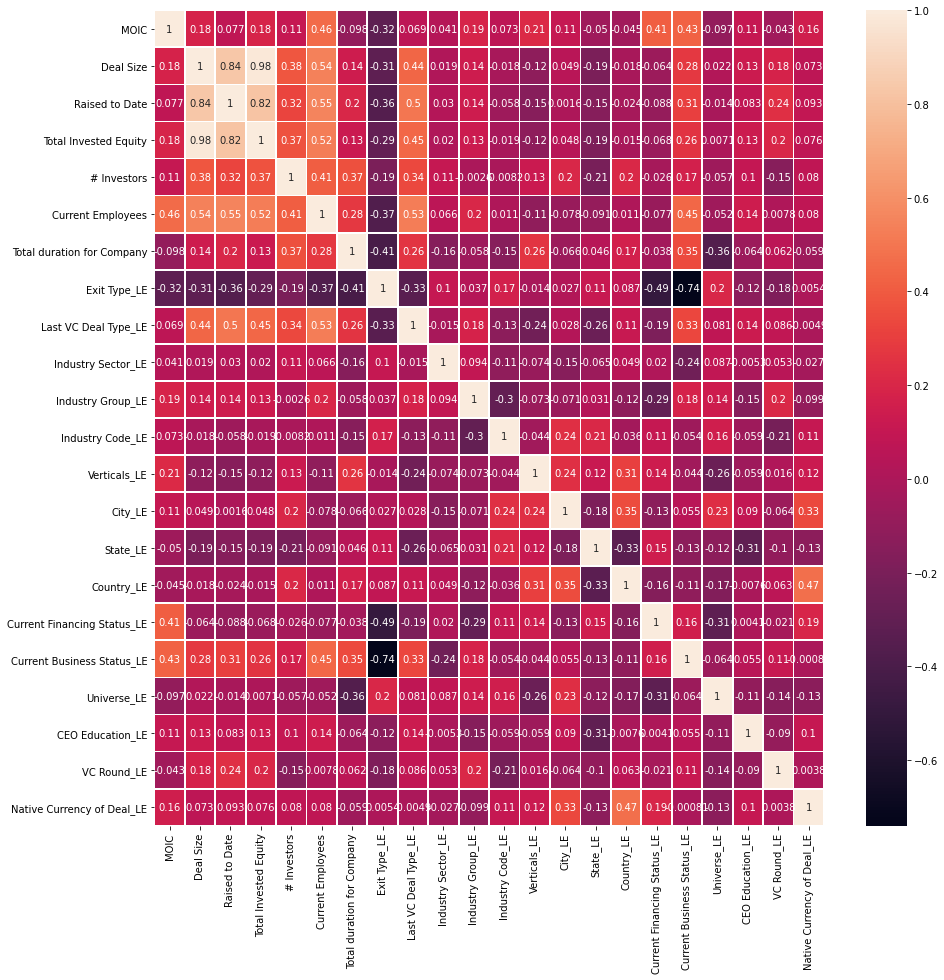

In [25]:

corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

Removal of The columns which are highly related to other columns

In [26]:
dataset=dataset.drop(columns=['Deal Size'])

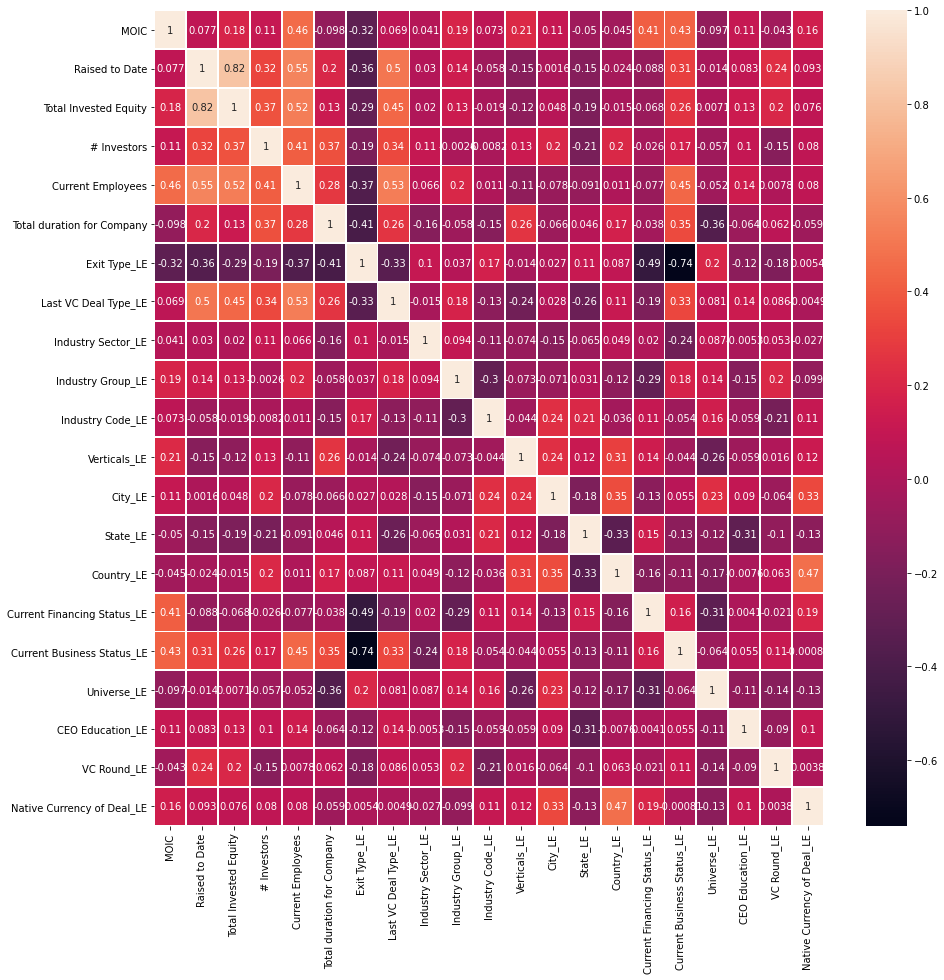

In [ ]:
corrMatrix= dataset.corr()

fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches

sn.heatmap(corrMatrix, annot=True,linewidth=0.8)
plt.show()

In [ ]:
dataset

,MOIC,Deal Size,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,16.44,10.10,10.10,10.10,2.000000,6.000000,8.0,2,1,1,3,2,13,9,10,7,1,0,7,5,1,3
17,3.81,3.30,3.30,3.30,6.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,1,3
18,3.81,14.50,17.80,14.50,3.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,2,3
19,3.81,20.00,37.80,20.00,8.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,25,3,3
21,8.94,158.00,335.00,158.00,20.000000,2062.000000,13.0,2,12,1,3,2,18,19,0,7,1,0,0,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.60,124.55,260.00,124.55,14.000000,200.000000,13.0,1,12,1,3,2,18,22,0,7,1,0,6,45,6,3
297,0.22,12.13,165.10,12.13,6.879121,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,10,9,3
298,0.22,51.35,139.00,51.35,18.000000,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,7,8,3
303,55.20,114.97,160.75,114.97,12.000000,3871.000000,10.0,1,9,1,3,3,16,20,0,7,1,2,6,25,5,3


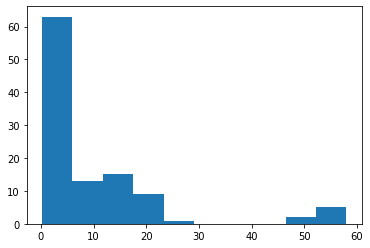

In [27]:
# histogram plot
from matplotlib import pyplot

pyplot.hist(dataset['MOIC'])
pyplot.show()

NameError: ignored

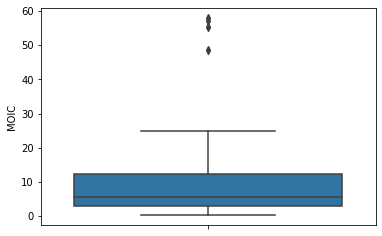

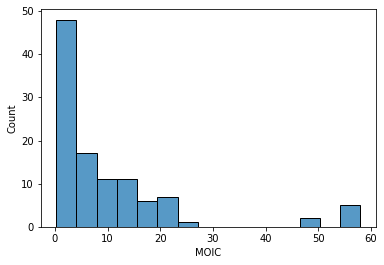

ValueError: ignored

In [ ]:
dataset

,MOIC,Deal Size,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE,Native Currency of Deal_LE
3,16.44,10.10,10.10,10.10,2.000000,6.000000,8.0,2,1,1,3,2,13,9,10,7,1,0,7,5,1,3
17,3.81,3.30,3.30,3.30,6.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,1,3
18,3.81,14.50,17.80,14.50,3.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,2,3
19,3.81,20.00,37.80,20.00,8.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,25,3,3
21,8.94,158.00,335.00,158.00,20.000000,2062.000000,13.0,2,12,1,3,2,18,19,0,7,1,0,0,9,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.60,124.55,260.00,124.55,14.000000,200.000000,13.0,1,12,1,3,2,18,22,0,7,1,0,6,45,6,3
297,0.22,12.13,165.10,12.13,6.879121,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,10,9,3
298,0.22,51.35,139.00,51.35,18.000000,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,7,8,3
303,55.20,114.97,160.75,114.97,12.000000,3871.000000,10.0,1,9,1,3,3,16,20,0,7,1,2,6,25,5,3


In [ ]:
X = dataset.iloc[:, 1:-1]

Y = dataset.iloc[:, 0:1]

In [ ]:
X

,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE
3,10.10,10.10,2.000000,6.000000,8.0,2,1,1,3,2,13,9,10,7,1,0,7,5,1
17,3.30,3.30,6.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,1
18,17.80,14.50,3.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,12,2
19,37.80,20.00,8.000000,660.553191,6.0,2,6,1,3,9,1,20,0,7,1,0,7,25,3
21,335.00,158.00,20.000000,2062.000000,13.0,2,12,1,3,2,18,19,0,7,1,0,0,9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,260.00,124.55,14.000000,200.000000,13.0,1,12,1,3,2,18,22,0,7,1,0,6,45,6
297,165.10,12.13,6.879121,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,10,9
298,139.00,51.35,18.000000,660.553191,16.0,2,12,1,3,3,18,11,7,7,1,0,2,7,8
303,160.75,114.97,12.000000,3871.000000,10.0,1,9,1,3,3,16,20,0,7,1,2,6,25,5


In [ ]:
Y

,MOIC
3,16.44
17,3.81
18,3.81
19,3.81
21,8.94
...,...
291,0.60
297,0.22
298,0.22
303,55.20


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

In [ ]:
print(X_train)

In [ ]:
print(X_test)

      Deal Size  Raised to Date  ...  CEO Education_LE  VC Round_LE
288  110.000000      345.500000  ...                31            7
267   90.000000      173.700000  ...                44            5
269  252.500000      252.500000  ...                39            2
253   15.000000       37.500000  ...                29            5
289   75.000000      235.500000  ...                31            6
158   55.941717        0.800000  ...                42           11
250    0.070000      118.873558  ...                 4           11
157    0.120000        1.840000  ...                42           11
137   15.700000       27.100000  ...                 2            3
187    2.050000        7.070000  ...                 6            3
161    0.500000        0.500000  ...                21            1
18    14.500000       17.800000  ...                12            2
249    0.100000        0.220000  ...                 4           11
290   80.000000      160.500000  ...            

Defining Function for Model Performance evaluation

### Building Models

In [ ]:
def eval_result(y_train,y_predtrain,y_test,y_predtest):

    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error

    rmse_train = mean_squared_error(y_train, y_predtrain, squared=False)
    print( f"RMSE Train error is {rmse_train}")
    rmse_test = mean_squared_error(y_test, y_predtest, squared=False)
    print( f"RMSE Test error is {rmse_test}")
    
    mae_train= mean_absolute_error(y_train, y_predtrain)
    print( f"MAE Train error is {mae_train}")
    mae_test= mean_absolute_error(y_test, y_predtest)
    print( f"MAE Test error is {mae_test}")

    pr1=pd.DataFrame(y_predtest,columns=["Pred"])

    pr1["Actual"]=y_test["MOIC"].values
    print(f"{pr1}")

   
  

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
multlin_model = LinearRegression()
multlin_model.fit(X_train,y_train)



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting result

In [ ]:
y_predtest= multlin_model.predict(X_test)

y_predtrain = multlin_model.predict(X_train)


In [ ]:
y_predtrain.mean(axis=0)

array([8.66790698])

evaluating model performance

In [ ]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 6.220705055495711
RMSE Test error is 10.929168567241156
MAE Train error is 4.775827499253842
MAE Test error is 7.7280380870106535
         Pred  Actual
0    2.928005    5.35
1    5.403973    9.00
2   34.533233   57.08
3    1.417695    3.90
4    4.347904    5.35
5    5.100057   12.39
6    7.903309   12.25
7    4.387431   12.39
8    6.426054    5.97
9    4.664313    0.73
10  46.876395   58.00
11  10.099136    3.81
12   9.948664   12.25
13   5.557505    5.35
14   5.872784   12.39
15  15.536669   21.29
16  46.012339   55.20
17  29.915998   48.52
18 -30.867240    0.98
19  -0.562844    0.22
20  -1.330837    5.81
21   7.106634   21.29


Ridge Regression

---



In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
import math


# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)

# ridge regression

ridge_model= Ridge()


ridge_regressor=GridSearchCV(ridge_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=ridge_regressor.fit(X_train,y_train)

In [ ]:
print('RMSE: %.3f' % math.sqrt(abs(results.best_score_))) ##  mean square error
print('Config: %s' % results.best_params_)   # printing best alpha

RMSE: 10.495
Config: {'alpha': 0.99}


In [ ]:

ridge_model= Ridge(alpha=0.11)
ridge_model.fit(X_train,y_train)
y_predtrain= ridge_model.predict(X_train)




In [ ]:
y_predtest= ridge_model.predict(X_test)



Evaluating model performance

In [ ]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 6.225783897510043
RMSE Test error is 10.687599109947392
MAE Train error is 4.767440889054722
MAE Test error is 7.677651897405918
         Pred  Actual
0    3.069168    5.35
1    5.481488    9.00
2   34.177536   57.08
3    1.867736    3.90
4    4.557148    5.35
5    5.400173   12.39
6    7.844508   12.25
7    4.657809   12.39
8    6.609747    5.97
9    4.951072    0.73
10  46.244043   58.00
11  10.043660    3.81
12   9.978638   12.25
13   5.830476    5.35
14   6.149071   12.39
15  15.258829   21.29
16  45.737857   55.20
17  29.270270   48.52
18 -27.940296    0.98
19  -0.793015    0.22
20  -1.292757    5.81
21   6.658407   21.29


In [ ]:
#ridge_regressor.cv_results_

### Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso


lasso_model= Lasso()


lasso_regressor=GridSearchCV(lasso_model, grid, scoring='neg_mean_squared_error',cv=10, return_train_score=True, verbose=0)
results=lasso_regressor.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1429.416023900887, tolerance: 0.6950177651948053
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/dist

In [ ]:
print('MSE: %.3f' % math.sqrt(abs(results.best_score_)))  ## mean square error
print(' %s' % results.best_params_)   # printing best alpha

MSE: 10.864
 {'alpha': 0.29}


In [ ]:
lasso_model= Lasso(alpha=0.85)
lasso_model.fit(X_train,y_train)
y_predtrain= lasso_model.predict(X_train)



train error is 7.544984551823937


In [ ]:
y_predtest= ridge_model.predict(X_test)


RMSE Test error is 10.63931490692644


NameError: ignored

Evaluating model performance

In [ ]:
eval_result(y_train,y_predtrain,y_test,y_predtest)

RMSE Train error is 6.225783897510043
RMSE Test error is 10.687599109947392
MAE Train error is 4.767440889054722
MAE Test error is 7.677651897405918
         Pred  Actual
0    3.069168    5.35
1    5.481488    9.00
2   34.177536   57.08
3    1.867736    3.90
4    4.557148    5.35
5    5.400173   12.39
6    7.844508   12.25
7    4.657809   12.39
8    6.609747    5.97
9    4.951072    0.73
10  46.244043   58.00
11  10.043660    3.81
12   9.978638   12.25
13   5.830476    5.35
14   6.149071   12.39
15  15.258829   21.29
16  45.737857   55.20
17  29.270270   48.52
18 -27.940296    0.98
19  -0.793015    0.22
20  -1.292757    5.81
21   6.658407   21.29


In [ ]:
# Read out attributes
coeffs = lasso_model.coef_         # dense np.array

#coeffs = lasso_model.sparse_coef_  # sparse matrix

#coeffs = lasso_model.intercept_    # probably also releva

coeffs



array([ 2.89497288e-03, -2.33215193e-02,  1.69356757e-02, -8.51662917e-02,
        7.97980463e-03, -1.01063651e+00, -0.00000000e+00, -9.04875533e-02,
        0.00000000e+00,  2.63487064e-01, -7.23959108e-02,  4.47847186e-01,
        1.54704964e-01, -5.75684938e-02, -2.04804252e-01,  2.99826635e+00,
        3.14728407e+00, -3.87095142e-02,  6.92989441e-03,  1.61704670e-02])

In [ ]:
X_test

,Deal Size,Raised to Date,Total Invested Equity,# Investors,Current Employees,Total duration for Company,Exit Type_LE,Last VC Deal Type_LE,Industry Sector_LE,Industry Group_LE,Industry Code_LE,Verticals_LE,City_LE,State_LE,Country_LE,Current Financing Status_LE,Current Business Status_LE,Universe_LE,CEO Education_LE,VC Round_LE
288,110.000000,345.500000,110.000000,13.000000,710.000000,11.0,1,13,1,3,2,11,17,0,7,1,1,6,31,7
267,90.000000,173.700000,90.000000,11.000000,669.000000,12.0,1,9,1,3,2,7,19,0,7,1,1,6,44,5
269,252.500000,252.500000,252.500000,11.000000,2968.000000,8.0,2,7,1,3,12,18,19,0,7,1,0,6,39,2
253,15.000000,37.500000,15.000000,5.000000,123.000000,16.0,1,7,1,3,8,18,19,0,7,1,1,6,29,5
289,75.000000,235.500000,75.000000,12.000000,710.000000,11.0,1,13,1,3,2,11,17,0,7,1,1,6,31,6
158,55.941717,0.800000,56.760213,2.000000,16.000000,6.0,2,4,1,3,2,12,6,1,7,1,0,2,42,11
250,0.070000,118.873558,56.760213,4.000000,11.000000,8.0,2,4,1,3,2,18,19,0,7,1,0,7,4,11
157,0.120000,1.840000,0.120000,2.000000,16.000000,6.0,2,4,1,3,2,12,6,1,7,1,0,2,42,11
137,15.700000,27.100000,15.700000,2.000000,112.000000,8.0,2,7,1,3,9,14,16,0,7,1,0,7,2,3
187,2.050000,7.070000,2.050000,6.000000,6.000000,6.0,2,3,1,3,12,13,23,11,7,1,0,7,6,3


### XGBOOST

In [ ]:
# Train and test set are converted to DMatrix objects, 
# as it is required by learning API. 
import xgboost as xg 


train_dmatrix = xg.DMatrix(data = X_train, label = y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = y_test) 
  
# Parameter dictionary specifying base learner 
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10) 

  


Predicting results

In [ ]:
y_trainpred=xgb_r.predict(train_dmatrix)
y_testpred = xgb_r.predict(test_dmatrix) 

Model Performance evaluation

In [ ]:
 eval_result(y_train,y_predtrain,y_test,y_predtest)